In-class exercise 3.3-3.4
UW AMATH 301 - Jakob Kotas

In [87]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return x**(1/2)

def g(x):
    return 2/3*x**(3/2)

In [111]:
#1

a = 0
b = 4
N = 1000

xvec = np.linspace(a,b,N+1) #N subintervals = N+1 points
h = (b-a)/N

#true value
integral_true = g(b)-g(a) #f.t.c.

#midpoint rule
integral_mid = 0
for k in range(0,N):
    integral_mid += f((xvec[k]+xvec[k+1])/2)
integral_mid = integral_mid*h

#trapezoid rule
integral_trap = f(xvec[0])+f(xvec[N])
for k in range(1,N):
    integral_trap += 2*f(xvec[k])
integral_trap = integral_trap*h/2

#trapz
integral_trapz = np.trapz(f(xvec),xvec)

#simpson's rule
xvec = np.linspace(a,b,2*N+1) #N subintervals = 2N+1 points
h = (b-a)/(2*N)

integral_simp = f(xvec[0])+f(xvec[2*N])
for k in range(1,2*N,2): #half-integer subscripts
    integral_simp += 4*f(xvec[k])
for k in range(2,2*N-1,2): #integer subscripts
    integral_simp += 2*f(xvec[k])
integral_simp = integral_simp*h/3

#quad
integral_quad,quad_error_estimate = scipy.integrate.quad(f,a,b)

print('true =',integral_true)
print('midpoint =',integral_mid)
print('trapezoid =',integral_trap)
print('trapz =',integral_trapz)
print('simpsons =',integral_simp)
print('simpsons abs.error =',np.abs(integral_simp-integral_true))
print('quad =',integral_quad)
print('quad abs.err. estimate =',quad_error_estimate)
print('quad abs.err. actual =',np.abs(integral_quad-integral_true))

true = 5.333333333333333
midpoint = 5.333348570365432
trapezoid = 5.333281075149455
trapz = 5.333281075149454
simpsons = 5.333326071960103
simpsons abs.error = 7.26137322981657e-06
quad = 5.333333333333335
quad abs.err. estimate = 5.921189464667503e-15
quad abs.err. actual = 1.7763568394002505e-15


In [127]:
#2

def z(y,x):
    return np.sin(x)+np.sin(y)+2

integral_dblquad,dblquad_error_estimate = scipy.integrate.dblquad(z,-4*np.pi,4*np.pi,-2*np.pi,2*np.pi)
integral_dbltrue = 64*np.pi**2

print('true =',integral_dbltrue)
print('dblquad =',integral_dblquad)
print('dblquad abs.err. estimate =',dblquad_error_estimate)
print('dlbquad abs.err. actual =',np.abs(integral_dblquad-integral_dbltrue))


true = 631.6546816697189
dblquad = 631.6546816697189
dblquad abs.err. estimate = 7.012775712019958e-12
dlbquad abs.err. actual = 0.0


In [73]:
#3(a)

dt = 1
xvec = np.arange(-4,4.5,dt)
fvec = np.array([4.5,2.5,1,-1,-1,-4,1.5,2.5,3.5])

n = len(xvec)

#f'(x)
fpvec = np.zeros(len(xvec))
for i in range(0,2): #forward difference on left two points
    fpvec[i] = (-3*fvec[i]+4*fvec[i+1]-fvec[i+2])/(2*dt)
for i in range(n-2,n): #backward difference on right two points
    fpvec[i] = (3*fvec[i]-4*fvec[i-1]+fvec[i-2])/(2*dt)
for i in range(2,n-2): #centered difference for all others
    fpvec[i] = (-fvec[i+2]+8*fvec[i+1]-8*fvec[i-1]+fvec[i-2])/(12*dt)
print('f\'(x) =',fpvec)

f'(x) = [-2.25       -1.25       -1.875      -0.79166667 -2.04166667  1.375
  3.95833333 -1.25        1.        ]


In [85]:
#3(b)

#f''(x)
f2pvec = np.zeros(len(xvec))
for i in range(0,2): #forward difference on left two points
    f2pvec[i] = (-3*fpvec[i]+4*fpvec[i+1]-fpvec[i+2])/(2*dt)
for i in range(n-2,n): #backward difference on right two points
    f2pvec[i] = (3*fpvec[i]-4*fpvec[i-1]+fpvec[i-2])/(2*dt)
for i in range(2,n-2): #centered difference for all others
    f2pvec[i] = (-fpvec[i+2]+8*fpvec[i+1]-8*fpvec[i-1]+fpvec[i-2])/(12*dt)
print('f\'\'(x) =',f2pvec)

#f'''(x)
f3pvec = np.zeros(len(xvec))
for i in range(0,2): #forward difference on left two points
    f3pvec[i] = (-3*f2pvec[i]+4*f2pvec[i+1]-f2pvec[i+2])/(2*dt)
for i in range(n-2,n): #backward difference on right two points
    f3pvec[i] = (3*f2pvec[i]-4*f2pvec[i-1]+f2pvec[i-2])/(2*dt)
for i in range(2,n-2): #centered difference for all others
    f3pvec[i] = (-f2pvec[i+2]+8*f2pvec[i+1]-8*f2pvec[i-1]+f2pvec[i-2])/(12*dt)
print('f\'\'\'(x) =',f3pvec)


f''(x) = [ 1.8125     -1.47916667  0.28819444 -0.32986111  0.95833333  4.03819444
 -2.00347222 -9.10416667  5.97916667]
f'''(x) = [-5.82118056e+00  2.96006944e+00  8.37384259e-01 -1.30208333e-02
  3.10300926e+00 -1.24334491e+00 -9.17997685e+00 -7.63020833e+00
  2.61753472e+01]


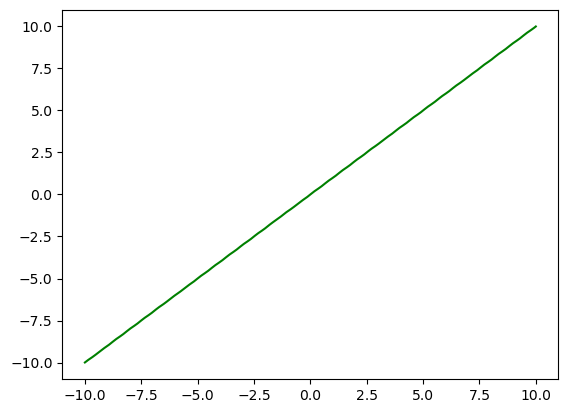

In [101]:
#4(a)

def h(x):
    return x+0.01*np.sin(10*x)
def hp(x):
    return 1+0.1*np.cos(10*x)
def hpp(x):
    return -np.sin(10*x)
def hppp(x):
    return -10*np.cos(10*x)

xvec = np.arange(-10,10.001,0.001)

plt.plot(xvec,h(xvec),'-g') #h(x)
#plt.plot(xvec,hp(xvec),'-b') #h'(x)
#plt.plot(xvec,hpp(xvec),'-r') #h''(x)
#plt.plot(xvec,hppp(xvec),'-m') #h'''(x)

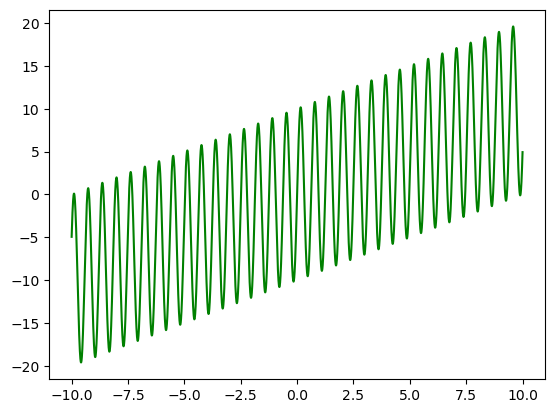

In [109]:
#4(b)

def j(x):
    return x+10*np.sin(10*x)
def k(x):
    return x**2/2-0.1*np.cos(10*x)-0.1
def l(x):
    return x**3/6-0.01*np.sin(10*x)-0.1*x

xvec = np.arange(-10,10.001,0.001)

plt.plot(xvec,j(xvec),'-g') #j(x)
#plt.plot(xvec,k(xvec),'-b') #k(x)
#plt.plot(xvec,l(xvec),'-r') #l(x)
#plt.axis([-10,10,-20,20])

In [125]:
#2

def m(z,y,x):
    return x*y*z

integral_tplquad,tplquad_error_estimate = scipy.integrate.tplquad(m,0,1,0,1,0,1)
integral_tpltrue = 1/8

print('true =',integral_tpltrue)
print('tplquad =',integral_tplquad)
print('tplquad abs.err. estimate =',tplquad_error_estimate)
print('tplquad abs.err. actual =',np.abs(integral_tplquad-integral_tpltrue))


true = 0.125
tplquad = 0.12499999999999999
tplquad abs.err. estimate = 5.527033708952211e-15
tplquad abs.err. actual = 1.3877787807814457e-17
